# XML   

In [82]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt                                                 # 실제로 그래프를 그려주는 애
import seaborn as sns

import matplotlib.font_manager as fm                                            # 한글폰트 안깨져서 나오게하기위해
font_name = fm.FontProperties(fname="C:\Windows/Fonts/malgun.ttf").get_name()    # 폰트 지정
plt.rc('font', family=font_name)                                                 # matplotlib내에 폰트 설정

mpl.rcParams["axes.unicode_minus"] = False        # 음수 설정, False로 지정하면 음수를 문자로 쓰지않고 숫자로 지정하겠다는 의미, 음수로 사용이 가능해진다.

In [ ]:
"""
*.XML(Extensible Markup Language) : 데이터를 가져오고 설명해주는 것

	1)메타언어
		GML(Geography) -> SGML(Standard) -> XML(ex) HTML)
	2)데이터를 위한 언어
	3)DB
	4)데이터의 표준화 : 이기종 시스템간의 정보교환, 웹서비스, 
		유비쿼터스, 사물인터넷 기타 등등...
	
*. XML 문법

	XML(.xml) : 실제 데이터를 저장하는 파일, 
    DTD(.dtd) : 설계도(간단 / 디테일한 설계 못함), 
    XML스키마(.xsd) : 설계도(복잡한 설계 가능 / 복잡), 
    XSL(XML Style sheet Language, XSLT) : 문서를 보기좋게 정리해줌

	(1) XML 문서 종류
        1) Well-Formed XML Document(잘 짜여진 문서)
           : 기본적인 XML 문법에 맞춰서 작성된 언어 
             ex) 시작태그< > 끝태그</ > 존재, 전체태그를 묶는 것은 단 하나만 존재해야함
		2) Valid XML Document(유효한 문서)
           : 설계도에 맞게끔 잘 짜여진 것
			
	(2) XML 기본 구조
		Prolog	- 1개
		Element	- 1개
		Misc	- 0개 이상
        
        ex) 채팅창 'users.xml' 다운해서 'Analysis - data'폴더에 저장
        
        <?xml version="1.0" encoding="utf-8" ?>     # 이문서가 xml 문서라는것을 표시하는것. 반드시 있어야하는 prolog
        <users>                                     # 전체 태그 1개 (element) / 루트 엘리먼트
            <user grade="gold">
                <name>Kim Cheol Soo</name>
                <age>25</age>
                <birthday>19940215</birthday>
            </user>
            <user grade="diamond">
                <name>Kim Yoo Mee</name>
                <age>21</age>
                <birthday>19980417</birthday>
            </user>
        </users>


	(3) Element 문법
		- 작성 규칙
			a) 모든 XML문서는 반드시 단 하나의 루트 엘리먼트를 가진다.
			b) 루트 엘리먼트는 여러 개의 자식 엘리먼트를 가질 수 있고 또 그 자식도 자신의 자식을 가질 수 있다.
			c) 시작태그와 끝태그는 반드시 짝을 이루어야 한다.
			d) "<"는 값으로 사용 불가. ">"는 사용할 수 있으나가급적 사용 금지
			e) "<"와 ">" 다음에 공백문자가 올 수 없으며 반드시 시작태그와 끝태그의 이름이 같아야 한다.
					
		- 종류
			a) 내용을 가지는 엘리먼트
			b) 내용이 없는 엘리먼트

		- 내용에 대한 종류
			a) 문자 데이터
			b) 자식 엘리먼트
			c) 엔티티 또는 문자 참조(&엔티티명;)
			d) CDATA Section
			e) 프로세싱 지시자
			f) 주석
			g) 공백 문자열

	(4) DTD 
		- 종류
			내부 DTD
			외부 DTD

		- 구성 요소
			엘리먼트 선언
			속성(attribute) 선언
			Entity 선언
			Notation 선언
			프로세싱 지시자
			파라미터 엔티티 참조
			주석
			공백
			conditional section

		- 문서 유형 선언
			<!DOCTYPE 루트엘리먼트명 SYSTEM 또는 PUBLIC "식별자">
			DOCTYPE은 반드시 대문자
			SYSTEM은 특정 단체나 업체내부에서 사용되는 경우
			PUBLIC은 공개
			식별자는 다운로드 받을 수 있는 경로
			PUBLIC일 경우 추가된 식별자
			+-//DTD를 개발 및 유지보수 업체명//DTD명 및 버전번호//사용된 언어

		- 엘리먼트 선언
			<!ELEMENT 엘리먼트명 컨텐트 유형>
			컨텐트 유형
				#PCDATA	: 내용으로 문자데이터만 갖는 엘리먼트
				자식 엘리먼트
					, : 작성 순서
						| : 선택
						? : 생략하거나 한번만 작성
						+ : 한번 이상
						* : 생략하거나 여러번 작성
						기호 없음 : 단 한번만 작성
					EMPTY
					MIXED : 문자데이터 또는 자식엘리먼트를 혼합형태
					ANY

			- ATTRIBUTE 선언
				<!ATTLIST 엘리먼트명 속성명 속성유형 디폴트선언>
				속성 유형
					CDATA	: 문자 데이터
					ENUMERATION	: dtd에 나열된 값 중 하나가 와야 함
					ID : 유일한 값을 지정
					IDREF/IDREFS : ID값을 참조
					NMTOKEN/NMTOKENS : 이름 작성 규칙을 준수하는 
						데이터만 사용
					NOTATION : dtd에 명시적으로 선언된 notation만 사용가능
					ENTITY : dtd에 명시적으로 선언된 entity만 사용 가능

		(5) 네임 스페이스
			CML
			-----
			<?xml version=1.0>
			<정보>
				<고유번호>111111-1111111</고유번호>
				<이름>홍길동</이름>
				...
			</정보>
			
			PML
			-----
			<?xml version=1.0>
			<정보>
				<고유번호>LC100</고유번호>
				<이름>캠코더</이름>
				...
			</정보>
			
			OML
			-----
			<?xml version=1.0>
			<주문정보 xmlns:고객="http://www.a.com/2017/Custom"
				xmlns:상품="http://www.a.com/2017/Product"
				xmlns="http://www.a.com/2017/Order">
				<주문번호>1</주문번호>
				<주문수량>10</주문수량>
				<결제>
					<방법>현금</방법>
					<금액>10000000</금액>
				</결제>
				
				<고객:고유번호>111111-1111111</고객:고유번호>
				<고객:이름>홍길동</고객:이름>
				
				<상품:고유번호>LC100</상품:고유번호>
				<상품:이름>캠코더</상품:이름>
				...
			</주문정보>
"""

In [1]:
import xml.etree.ElementTree as elemTree

In [ ]:
# XML을 파싱(Parsing)하는 방법 : 필요한 값 추출해오는 방법
#   1. xml파일로 존재하는 경우 : parse()
#   2. xml문자열(메모리에 존재) 형태로 존재하는 경우 : fromstring()


In [5]:
# 불러오는 방법1 : parse 이용하기 / 메모리에는 트리구조로 저장되어있다.
tree = elemTree.parse("data/users.xml")
tree

xmlstr = """<?xml version="1.0" encoding="utf-8" ?>   
<users>
	<user grade="gold">
            <name>Kim Cheol Soo</name>
            <age>25</age>
            <birthday>19940215</birthday>
        </user>
        <user grade="diamond">
            <name>Kim Yoo Mee</name>
            <age>21</age>
            <birthday>19980417</birthday>
        </user>
</users>
"""

# 불러오는 방법2 : fromstring 이용하기 / 메모리에는 트리구조로 저장되어있다.
tree = elemTree.fromstring(xmlstr) # xmlstr=""" 첫번째 줄에 바로 내용이 위치해야함
tree

<Element 'users' at 0x00000000051CB7C8>

In [28]:
# 태그< > 검색 및 데이터 다루기 
# XPATH : ./ (현재위치를 나타내기 위한 경로), ../ (상위 위치를 나타내기 위한 경로), XML에서 사용하는 로컬 경로

# user = tree.find("user") # find : 검색을 위한 메서드
# user = tree.find("user[1]") # XML은 1부터 시작함
user = tree.find("./user[1]")
user

dir(user) # 목록을 볼 수 있다
print(user.tag) # 태그의 이름을 가져옴 위에보면 <user grade~..> 있음
print(user.attrib) # 태그의 속성을 가져옴, 딕트의 형식으로 속성을 가져온다
print(user.get("grade")) # 키 값을 넣어주면 키에해당하는 값을 알려줌

username = user.find("name") # user 라는 태그 안에서 찾을수 있는 것
username # <name> Kim Cheol ~... 찾기, name태그에 접근
print(username.text) # 'Kim Cheol Soo' : text노드, 더이상 태그를 끼워넣을수 없는 형태(=단말 노드)

userage = user.find("age")
print(userage.text)

user
{'grade': 'gold'}
gold
Kim Cheol Soo
25


In [31]:
# 태그의 조건으로 검색

user = tree.find("user[2]") # user 태그에 접근, [] 안에 인덱스에 접근

user = tree.find("user[@grade]") # 속성에 접근하려고 할때 @ 
print(user.attrib)

user = tree.find("user[@grade][2]") # 2번째 태그의 속성으로 바로 접근 할때 @ 
print(user.attrib)

{'grade': 'gold'}
{'grade': 'diamond'}


In [34]:
# 여러 개의 태그를 한꺼번에 가져오기

users = tree.findall("user") # findall 사용하면 다 찾아줌. 2개의 user 값을 가져온 결과를 볼 수 있다. 
users 

for user in users:
    print(user.attrib)
    print(user.find("name").text)

{'grade': 'gold'}
Kim Cheol Soo
{'grade': 'diamond'}
Kim Yoo Mee


In [43]:
# attribute값 읽기

tree = elemTree.parse("data/users.xml") # 파일 불러와서 처음부터 시작해야함

users = tree.getroot() # 가장 꼭대기 정보를 가져와라
print(users)
print(users.tag)
print(users.attrib) # 속성값이 없으니까 안나옴

user = users.find("./user")
print(user.get("grade")) # user 태그는 속성이 있으니까 값을 꺼내 올 수 있다.
print(user.keys())
print(user.items())

<Element 'users' at 0x00000000054B8E08>
users
{}
gold
['grade']
[('grade', 'gold')]


# JSON (JavaScript Object Notation)

    dumps : 데이터 저장할 때
    loads : 데이터 불러올 때

In [44]:
# XML 보면 태그< >가 데이터보다 많은 경우가 있다.
# 용량을 너무 많이 차지하게 되니 
# 그걸 보완하고자 나온 것이 JSON 
# {} 를 이용해서 키와 값으로 묶어 준것 {키 : 값}

In [45]:
import json

In [50]:
j1 = {"name":"홍길동", "birth":"0524", "age":20}
print(type(j1)) # 형식 dict임. json 아님
print(j1)

j2 = json.dumps(j1) # json형식으로 저장하겠다는 의미
print(type(j2)) # json 으로 바꿨다는 것은 평범한 문자열로 바꿨다는 의미. 그래서 str 로 나옴
print(j2)

<class 'dict'>
{'name': '홍길동', 'birth': '0524', 'age': 20}
<class 'str'>
{"name": "\ud64d\uae38\ub3d9", "birth": "0524", "age": 20}


In [52]:
json.dumps([1, 2, 3]) # 리스트를 dumps로 저장시키면 전체를 하나의 문자로 만듦
json.dumps((4, 5, 6)) # 튜플로 묶어도 하나의 문자열로 처리한다

'[4, 5, 6]'

In [56]:
j3 = json.loads(j2) # 문자열이였던거 불러오면 딕트가 되서 키, 값 사용 가능
print(type(j3))
print(j3)

<class 'dict'>
{'name': '홍길동', 'birth': '0524', 'age': 20}


In [75]:
obj = """
{
    "id": "0001",
    "type": "donut",
    "name": "Cake",
    "ppu": 0.55,
    "batters":
        {
            "batter":
                [
                    { "id": "1001", "type": "Regular" },
                    { "id": "1002", "type": "Chocolate" },
                    { "id": "1003", "type": "Blueberry" },
                    { "id": "1004", "type": "Devil's Food" }
                ]
        },
    "topping":
        [
            { "id": "5001", "type": "None" },
            { "id": "5002", "type": "Glazed" },
            { "id": "5005", "type": "Sugar" },
            { "id": "5007", "type": "Powdered Sugar" },
            { "id": "5006", "type": "Chocolate with Sprinkles" },
            { "id": "5003", "type": "Chocolate" },
            { "id": "5004", "type": "Maple" }
        ]
}
"""

print(type(obj))  # 하나의 문자열임을 알 수 있다.

result = json.loads(obj)
print(type(result)) # 파이썬에서 사용가능한 dict형식으로 바뀌었음을 볼 수 있다.
print(result) # 딕트형식으로 나온 결과값 볼 수 있다

print("------------------------------------------------------------------------------------------------")
print(result["id"]) # xml에서는 id라는 태그< > 이름으로 접근했지만 이제는 키 이름으로 접근 가능

print("------------------------------------------------------------------------------------------------")
print(result["batters"]["batter"][1]["id"])

<class 'str'>
<class 'dict'>
{'id': '0001', 'type': 'donut', 'name': 'Cake', 'ppu': 0.55, 'batters': {'batter': [{'id': '1001', 'type': 'Regular'}, {'id': '1002', 'type': 'Chocolate'}, {'id': '1003', 'type': 'Blueberry'}, {'id': '1004', 'type': "Devil's Food"}]}, 'topping': [{'id': '5001', 'type': 'None'}, {'id': '5002', 'type': 'Glazed'}, {'id': '5005', 'type': 'Sugar'}, {'id': '5007', 'type': 'Powdered Sugar'}, {'id': '5006', 'type': 'Chocolate with Sprinkles'}, {'id': '5003', 'type': 'Chocolate'}, {'id': '5004', 'type': 'Maple'}]}
------------------------------------------------------------------------------------------------
0001
------------------------------------------------------------------------------------------------
1002


# BeautifulSoup

### 웹소스 읽기

In [2]:
from urllib.request import urlopen   # 소스 불러오기

In [101]:
html = urlopen("http://google.com")
print(type(html)) 
print(html.read()) # 구글 html 소스 다 긁어온거

<class 'http.client.HTTPResponse'>
b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="Oe7PFZNvPBZqh7yhyhwEzg==">(function(){window.google={kEI:\'9X4eXvSFAsHGmAX8sb2oDA\',kEXPI:\'0,1353747,5662,731,31,192,1418,1692,1617,377,207,2414,540,250,10,572,479,175,364,925,51,143,35,3,209,69,4,60,315,373,54,208,10,33,3,1129432,143,1197736,413,39,329079,1294,12383,4855,32692,15247,867,28684,369,524,2790,5505,7912,472,4858,1360,2,283,4040,4968,3024,4743,3118,7915,1808,1976,2044,8909,5297,2054,920,873,1217,1710,1,1264,6430,11307,2883,16,322,1981,2536,2777,519,400,2277,8,4375,14,667,500,112,2212,202,328,149,1103,840,517,318,824,278,54,48,158,662,3438,108,152,52,1137,2,2063,606,1839,184,595,1182,520,1947,747,429,44,1009,93,328,1284,16,84,417,1760,666,45,1594,607,474,1339

In [102]:
from urllib.error import HTTPError, URLError  # 예외처리 수월하게 하기

try:
    html = urlopen("https://www.naver.com")
except HTTPError as e:
    print("HTTP 에러입니다 : " + str(e))
except URLError as e:
    print("URL 에러입니다 : " + str(e))
else:
    print(html.read())

b'<!doctype html>\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<html lang="ko">\n<head>\n<meta charset="utf-8">\n<meta name="Referrer" content="origin">\n<meta http-equiv="Content-Script-Type" content="text/javascript">\n<meta http-equiv="Content-Style-Type" content="text/css">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=1100">\n<meta name="apple-mobile-web-app-title" content="NAVER" />\n<meta name="robots" content="index,nofollow"/>\n<meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/>\n<meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84">\n<meta property="og:url" content="https://www.naver.com/">\n<meta property="og:image" content="https://s

In [103]:
# 이미지 다운로드 1 : urlretrieve 이용하기

import urllib.request as req

req.urlretrieve("https://t1.daumcdn.net/daumtop_chanel/op/20170315064553027.png",
               "data/daum.png")  # 이미지 주소 붙여넣기 # 저장할 장소 지정 
print("저장되었습니다.")


저장되었습니다.


In [104]:
# 이미지 다운로드 2 : urlopen 이용하면 불편함

img = urlopen("https://t1.daumcdn.net/daumtop_chanel/op/20170315064553027.png")
img = img.read()  # 이미지를 숫자로 읽어옴

f = open("data/daum2.png", "wb") # wb : 이진수로 저장
f.write(img)
print("저장되었습니다.")
f.close()

저장되었습니다.


In [109]:
import urllib.parse  # 파싱해주는 객체

# 채팅창에 http://www.weather.go.kr/weather/lifenindustry/sevice_rss.jsp 들어가서
# 서울 경기도 중기예보(중기예보 서울,경기 RSS 클릭한후 주소 복사): http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109
# ? : 현재 이서버에 접속할떄 어떤 데이터를 가지고 서버에 접속할 것인지 작성해주는 기호

api = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp" # 실제 정보를 제공하는 주소가지만 복사
value = {"stnId":109} # dict형식으로 url변환주기

params = urllib.parse.urlencode(value) 
print(params)

url = api + "?" + params
print(url)

data = urlopen(url).read()
# print(data)
data = data.decode("utf-8") # 한글코드 입력되도록
print(data)

stnId=109
http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2020년 01월 15일 (수)요일 06:00</pubDate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>서울,경기도 육상 중기예보 - 2020년 01월 15일 (수)요일 06:00 발표</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp</guid>
<description>
	<header>
		<title>서울,경기도 육상중기예보</title>
		<tm>202001150600</tm>
		<wf><![CDATA[기압골 영향으로 19일에 눈이 오겠고, 그 밖의 기간에는 고기압의 가장자리에 들어 가끔 구름많겠습니다.<br />기온은 평년(최저기온: -9~-5℃, 최고기온: 1~2℃)과 비슷하거나 조금 높겠습니다.<br />강수량은 평년(0~1mm)과 비슷하거나 조금 많겠습니다. <br />서해중부해상의 물결은 24일에 1.0~3.0m로 일겠고, 그 밖의 날은 1.0~2.0m로 일겠습니다.]]></wf>
	</header>
	<body>
				

		<location wl_ver="3">
				<prov

In [110]:
 # 채팅방에서 test_first.html 다운받아서 data폴더에 넣어두기

## BeautifulSoup

In [3]:
from bs4 import BeautifulSoup

In [135]:
page = open("data/test_first.html").read() # read : 전체 데이터 불러오기 , readllines : 전체 데이터 한줄씩 리스트로 묶어서 가져오기
print(type(page)) # 하나의 문자열임을 알 수 있다

soup = BeautifulSoup(page, "html.parser") # 트리구조로 저장될 수 있도록 바꿔주기 # 트리구조 그려보기
print(soup.prettify()) # prettyify : 깔끔하게 보여주도록

<class 'str'>
<!DOCTYPE html>
<html>
 <head>
  <title>
   Very Simple HTML Code by PinkWink
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    Happy PinkWink.
    <a href="http://www.pinkwink.kr" id="pw-link">
     PinkWink
    </a>
   </p>
   <p class="inner-text second-item">
    Happy Data Science.
    <a href="https://www.python.org" id="py-link">
     Python
    </a>
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    Data Science is funny.
   </b>
  </p>
  <p class="outer-text">
   <b>
    All I need is Love.
   </b>
  </p>
 </body>
</html>


In [136]:
print(list(soup.children)) # children : 자식들 list로 나열해줌
list(soup.children)[0]
list(soup.children)[1] # \n 엔터키값도 구성원으로 취급되어 하나의 문자열로 나타남
list(soup.children)[2] # 모든 자식 데이터를 다 가져옴 # ←내가 필요한 데이터

html = list(soup.children)[2]

['html', '\n', <html><head>
<title>Very Simple HTML Code by PinkWink</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>
</html>]


In [142]:
# 파일내에 공백 없애주기 <html><head>
list(html.children)
list(html.children)[0]
list(html.children)[1]

body = list(html.children)[2]

In [145]:
# soup.body
body

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

In [149]:
# 태그명으로 접근
soup.find("p")
soup.find_all("p")

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>, <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>, <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>, <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

In [150]:
# 태그명과 클래스명으로 접근
soup.find_all("p", class_="outer-text")

[<p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>, <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

In [152]:
# id로 접근 : 같은 페이지 안에서 동일하게 쓸수 없기 때문에 불러오기 좋다. 하지만 id 속성값이 없을 수 도 있기에 주의
soup.find_all(id="second")

[<p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>]

In [160]:
# 형제 노드로 접근 # ex) head의 형제는 body, next_sibling 한번만 입력하면 \n 나오므로 2번 입력
soup.head.next_sibling.next_sibling

body.p.next_sibling.next_sibling  # 첫번째 p 태그에 먼저 접근한 후, next_sibling을 이용하여 2번쨰 p태그에 접근한다

<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>

In [171]:
# 데이터(Text Node, 단말노드) 가져오기

soup.html.get_text() # html안에 들어있는 text 다 가지고옴
soup.head.get_text() # head안에 들어있는 text 다 가지고옴
soup.title.get_text()
soup.div.get_text() # div안에 들어있는 text 다 가지고옴

soup.p.get_text() # 첫번째 p태그에 있는 것만 가져옴

for p in soup.find_all("p"): # 모든  p태그에 있는 거 다 가져옴
    print(p.get_text())


                Happy PinkWink.
                PinkWink


                Happy Data Science.
                Python



                Data Science is funny.
            



                All I need is Love.
            



In [174]:
# 속성값에 접근하기
links = soup.find("a")
links
links["href"] # 링크 하나만 가져올때

links = soup.find_all("a")
for link in links:
    href = link["href"]
    text = link.string
    print(text, "=>", href)

PinkWink => http://www.pinkwink.kr
Python => https://www.python.org


# 실전 예제

In [249]:
# 네이버 환율정보 가져오기
url = "https://finance.naver.com/marketindex/"
page = urlopen(url) # 접속해서 소스 불러오기
soup = BeautifulSoup(page, "html.parser")

# for div in soup('div', class_="head_info") :
#     for span in div('span', class_="value"):
#         print(span.get_text())
        

# for div in soup('div', class_="data"):
#     for h3 in div('h3', class_="h_lst"):
#         for span in h3('span', class_="blind"):
#             a= span.get_text()
#     for span in div('span', class_="value"):
#         b= span.get_text()


            
            


In [203]:
# 쌤

span = soup.find_all("span", class_="value")
# print("미 환율 : ", span[0].get_text())
print("미 환율 : ", span[0].string)

div = soup.find_all("div", class_="head_info")
span1 = div[0].find_all("span")
print(span1[0].string)

span2 = soup.select_one("div.head_info > span.value").string  # ' .' : class에 접근하겠다는 의미
# 만약 head_info와 value값이 class 속성이 아니라 id속성일 경우
# span2 = soup.select_one("div#head_info > span#value").string
print(span2)

미 환율 :  1,157.60
1,157.60
1,157.60


In [226]:
# 윤동주 시인의 작품을 추출
url = "https://ko.wikipedia.org/wiki/%EC%9C%A4%EB%8F%99%EC%A3%BC"
page = urlopen(url)
soup = BeautifulSoup(page, "html.parser")

# 쌤
ul1 = soup.select("div.mw-parser-output > ul")
ul1[0]
for i in ul1[0]:
    if i != "\n":
        print(i.string)


In [254]:
# 웹크롤링 연습하는 사이트
url = "http://www.pythonscraping.com/pages/warandpeace.html"
page = urlopen(url)
soup = BeautifulSoup(page, "html.parser")

# 녹색 단어만 골라오기

# for div in soup('div', id="text"):
#     for span in div('span', class_="green"):
#         print(span.get_text())
            
            
# 쌤1
# green = soup.find_all("span", class_="green")
# for g in green:
#     print(g.string)
    
    
# 쌤2
# green = soup.select("div#text > span.green")
# for g in green:
#     print(g.string)


# 쌤3
# green = soup.find_all("span", {"class":"green"})
# for g in green:
#     print(g.string)

# h태그 (h1, h2, h3, h4, h5, h6)를 이용한 제목 추출
# titles = soup.find_all(["h1", "h2", "h3"])
# print([title for title in titles])

# 녹색과 적색단어 모으기
green_red = soup.find_all("span", {"class":{"green", "red"}})
print([text.string for text in green_red])

["Well, Prince, so Genoa and Lucca are now just family estates of the\nBuonapartes. But I warn you, if you don't tell me that this means war,\nif you still try to defend the infamies and horrors perpetrated by\nthat Antichrist- I really believe he is Antichrist- I will have\nnothing more to do with you and you are no longer my friend, no longer\nmy 'faithful slave,' as you call yourself! But how do you do? I see\nI have frightened you- sit down and tell me all the news.", 'Anna\nPavlovna Scherer', 'Empress Marya\nFedorovna', 'Prince Vasili Kuragin', 'Anna Pavlovna', 'St. Petersburg', 'If you have nothing better to do, Count [or Prince], and if the\nprospect of spending an evening with a poor invalid is not too\nterrible, I shall be very charmed to see you tonight between 7 and 10-\nAnnette Scherer.', 'Heavens! what a virulent attack!', 'the prince', 'Anna Pavlovna', "First of all, dear friend, tell me how you are. Set your friend's\nmind at rest,", 'Can one be well while suffering mora

In [262]:
url = "http://www.pythonscraping.com/pages/page3.html" # 열 tD 행 tr
page = urlopen(url)
soup = BeautifulSoup(page, "html.parser")

# 제목행은 건너뛰고 나머지 모든 행 리스트를 수집
# for tr in soup.find("table", {"id":"giftList"}).tr.next_siblings:
#     print(tr)

# 가격 중에 $15.00 수집
print(soup.find("img", {"src":"../img/gifts/img1.jpg"}).parent.previous_sibling) # 부모 태그에 먼저 접근 # 그전의 형제에 접근

<td>
$15.00
</td>


In [266]:
# 영화리뷰
# https://movie.daum.net/moviedb/grade?movieId=94484&type=netizen&page=1

review_list = []

for n in range(1, 6):
    target = urlopen("https://movie.daum.net/moviedb/grade?movieId=94484&type=netizen&page={}".format(n))
    soup = BeautifulSoup(target, "html.parser")
    
    reviews = soup.select("p.desc_review")
    for review in reviews:
        str = review.get_text().strip()
#         print(str)
        review_list.append(str)

f = open("data/아쿠아맨.txt", "w")
for review in review_list:
    f.write(review + "\n")
f.close()

## 영화 평점 분석

    http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20170806

In [267]:
url = "http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20170806"
page = urlopen(url)
soup = BeautifulSoup(page, "html.parser")

In [271]:
# 영화 제목 가져오기
soup.find_all("div", "tit5")
soup.find_all("div", "tit5")[0].a.string # 필요한 데이터 잘 가져오고있는지
len(soup.find_all("div", "tit5")) # 개수확인

47

In [273]:
# 포인트 가져오기
soup.find_all("td", "point")[0].string # 필요한 데이터 잘 가져오고있는지
len(soup.find_all("td", "point")) # 개수확인

47

In [277]:
movie_name = [soup.find_all("div", "tit5")[n].a.string for n in range(0, 47)]
movie_point = [soup.find_all("td", "point")[n].string for n in range(0, 47)]

In [279]:
movie_name
movie_point

['9.32',
 '9.27',
 '9.25',
 '9.24',
 '9.23',
 '9.23',
 '9.21',
 '9.20',
 '9.18',
 '9.14',
 '9.10',
 '9.10',
 '9.09',
 '9.08',
 '9.05',
 '9.05',
 '9.02',
 '9.00',
 '8.93',
 '8.91',
 '8.90',
 '8.87',
 '8.86',
 '8.83',
 '8.76',
 '8.75',
 '8.73',
 '8.70',
 '8.62',
 '8.59',
 '8.58',
 '8.48',
 '8.48',
 '8.47',
 '8.39',
 '8.34',
 '8.32',
 '8.12',
 '7.97',
 '7.84',
 '7.39',
 '7.26',
 '6.97',
 '6.59',
 '6.09',
 '5.17',
 '5.00']

In [282]:
# 2017년 5월 1일부터 100일간의 데이터 수집

date = pd.date_range("2017-5-1", periods=100, freq="D")
date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [286]:
from tqdm import tqdm_notebook
import urllib

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):  # today : 시계열 데이터의 날짜 타입. 문자열로 바꿔줘야한다
    url = "http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    page = urlopen(url.format(date=urllib.parse.quote(today.strftime("%Y%m%d")))) # today 문자열로 바꿔준다
    soup = BeautifulSoup(page, "html.parser")
    
    cnt = len(soup.find_all("td", "point")) # 개수 알기
    
    movie_date.extend([today for n in range(0, cnt)])
    movie_name.extend([soup.find_all("div", "tit5")[n].a.string for n in range(0, cnt)])
    movie_point.extend([soup.find_all("td", "point")[n].string for n in range(0, cnt)])

In [287]:
len(movie_date), len(movie_name), len(movie_point) # 100일동안 랭킹에 오른 영화 개수 잘 나왔는지 확인해보기

(4723, 4723, 4723)

In [290]:
movie = pd.DataFrame({"date":movie_date, "name":movie_name, "point":movie_point}) # 데이터 프레임 만들기
movie.head()
movie.info() # point 자료타입 객체형임을 알수있다. 나중에 계산하려면 숫자형이여야한다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
date     4723 non-null datetime64[ns]
name     4723 non-null object
point    4723 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 110.8+ KB


In [292]:
movie["point"] = movie["point"].astype(float) # point 부분 숫자형으로 바꿔주기
movie.info()
movie.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
date     4723 non-null datetime64[ns]
name     4723 non-null object
point    4723 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25


In [296]:
# 영화별로 점수의 합계를 보고싶다.(합계가 높은 순 또는 낮은 순으로 )

m_point = pd.pivot_table(movie, index=["name"], aggfunc=np.sum)
m_point.head()

m_best = m_point.sort_values(by="point", ascending=True)
m_best.head(10)

,point
name,
애나벨,6.92
비포 선셋,8.74
본 투 비 블루,8.77
짱구는 못말려 극장판: 폭풍수면! 꿈꾸는 세계 대돌격,8.85
비포 선라이즈,8.90
로건,9.06
더 록,9.30
사랑은 비를 타고,9.31
인생은 아름다워,9.38


In [298]:
# 특정 영화만 추려서 보고 싶다면?
tmp = movie.query("name==['겟 아웃']")
tmp.head(20)

,date,name,point
833,2017-05-17,겟 아웃,8.36
889,2017-05-18,겟 아웃,8.18
933,2017-05-19,겟 아웃,8.20
980,2017-05-20,겟 아웃,8.18
1022,2017-05-21,겟 아웃,8.18
1061,2017-05-22,겟 아웃,8.11
1102,2017-05-23,겟 아웃,8.15
1146,2017-05-24,겟 아웃,8.15
1192,2017-05-25,겟 아웃,8.15
1236,2017-05-26,겟 아웃,8.16


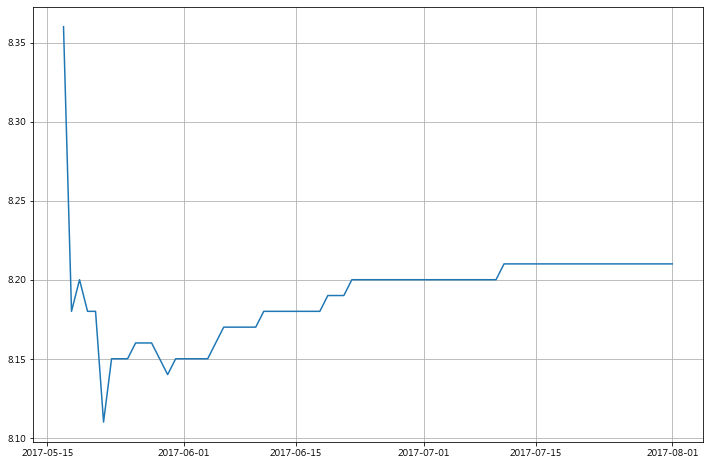

In [301]:
# '겟아웃'영화 시각화
plt.figure(figsize=(12, 8))
plt.plot(tmp["date"], tmp["point"])
plt.grid()

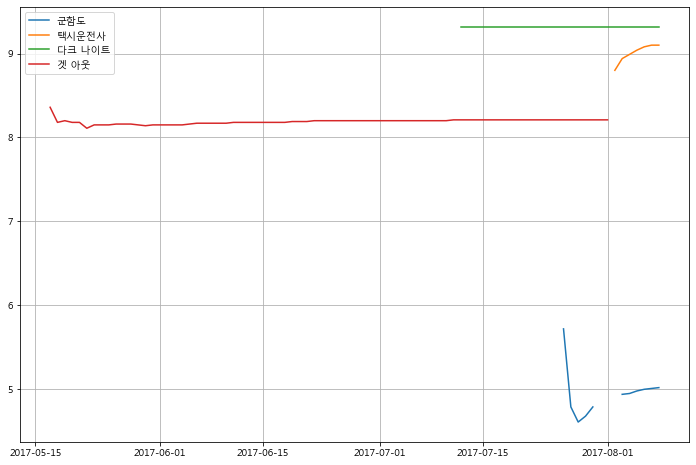

In [307]:
# 영화별 날짜 변화에 따른 평점 변화 확인
movie_pivot = pd.pivot_table(movie, index=["date"], columns=["name"], values=["point"])
movie_pivot.head()

movie_pivot.columns = movie_pivot.columns.droplevel() # point 컬럼 나타내주었던거 사라지게해서 좀더 보기좋게하기
movie_pivot.head()

target_col = ["군함도", "택시운전사", "다크 나이트", "겟 아웃"] # 각영화의 평점 시각화하기
plt.figure(figsize=(12, 8))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc="best")
plt.grid()

### 로그인을 해야 하는 경우

    - http
    - https(security) 

In [5]:
import requests
from bs4 import BeautifulSoup

In [7]:
# http 상태인 한빛출판네트워크 로그인해서 크롤링하기

url = "https://www.hanbit.co.kr/member/login_proc.php" # 아이디와 패스워드 처리하는 페이지

data = {"m_id":"본인아이디", "m_passwd":"본인패스워드", 
        "return_url":"http://www.hanbit.co.kr"} 
      # 아이디랑 패스워드 입력해넣기 # dict형식 # 아이디와 패스워드를 입력하는 창에 변수이름이(F12 누르고 나온거) 무엇인지 확인하기

# 한번 로그인하면 어느 페이지를 가던 로그인 상태로 만들기(=session)
session = requests.session()
res = session.post(url, data) # 내 아이드와 패스워드 서버에게 보내주기
# print(res) # '200' 이라고 뜨면 잘 접속했음을 알려주는 것 # 상태코드 : 200

# 한빛 마이 페이지 내용 긁어오기
url_mypage = "http://www.hanbit.co.kr/myhanbit/myhanbit.html"
res = session.get(url_mypage)
# print(res.text) # 이후 태그에 접근해서 가져오면 됨

soup = BeautifulSoup(res.text, "html.parser")
mileage = soup.select_one(".mileage_section1 span").get_text() # ' span' span 앞에 한칸 띈것은 자식코드 불러오겠다는거
ecoin = soup.select_one(".mileage_section2 span").get_text()

print("마일리지 : ", mileage)
print("이코인 : ", ecoin)

AttributeError: 'NoneType' object has no attribute 'get_text'

## Selenium

    - PhantomJS 또는 Chrome Driver (웹브라이저 조정하는 애들)  
        chromedriver를 다운로드 받아 적당한 위치에 압축을 풀어놓는다.
        
    - pip install selenium

In [9]:
# Selenium : 수동으로 조작해야할때 원격으로 조작할수있도록
# chrome에서 chrome driver 쳐서 다운받기 # https://chromedriver.chromium.org/downloads
# 'ChromeDriver 79.0.3945.36' 로 다운받기
# 압축 푼거 복사해서 C드라이브에 'chromedriver'폴더 만들어서 넣어주기
# 도스창에 pip install selenium 입력해서 설치하기 

In [28]:
from selenium import webdriver

driver = webdriver.Chrome("C:/chromedriver/chromedriver") # 원격조정할 프로그램 불러오기 # .exe 안써도됨 파일명만 넣으면 된다
# shift+enter 하면 창이 뜨는데 '엑세스 허용'눌러주기 # 'chorome이 자동화된~ 있습니다.' 써져있는 창 나오면 됨

# 네이버 로그인창
driver.get("https://nid.naver.com/nidlogin.login?mode=form&url=https%3A%2F%2Fwww.naver.com")

# 접근한 페이지 캡쳐 뜨기
# driver.save_screenshot("data/001.png")

In [29]:
# 따로 웹브라우저 하나 띄워서 네이버, F12 , 로그인페이지, id와 passwd 이름명 확인해보기

# 아이디 입력
elem_login = driver.find_element_by_id("id") # id로 접근하겠다는 태그 
elem_login.clear() # id 입력란에 기존에 어떤 값이 들어있을경우 지워버리고 새로 입력하겠다는 의미
elem_login.send_keys("본인아이디입력") # 키값을 보낸다 # 원격으로 접근한 페이지에 아이디 자동 입력됨

# 패스워드 입력
elem_login = driver.find_element_by_id("pw") 
elem_login.clear() 
elem_login.send_keys("본인비번입력")

# F12 로그인 버튼 클릭 - 소스에서 마우스 오른쪽 버튼 - copy - copy xpath - 변수(xpath) 쓰고 """ """ 안에 붙여넣기
xpath = """//*[@id="log.login"]""" # 내가 클릭할 버튼의 위치 알아온것
driver.find_element_by_xpath(xpath).click()

# but, 네이버 자동입력 방지문자는 직접 입력해주기

### 셀프 주유소는 정말 저렴한가?

    - http://www.opinet.co.kr/

In [77]:
driver = webdriver.Chrome("C:/chromedriver/chromedriver") # 원격조정할 프로그램 불러오기 
driver.get("http://www.opinet.co.kr/searRgSelect.do")

In [78]:
# 주유소/충전소 찾기 버튼
xp = """//*[@id="gnb"]/ul/li[1]/a""" # 주유소/충전소 찾기 버튼의 위치와 이름 
driver.find_element_by_xpath(xp).click()

In [79]:
# 지역별 버튼
xp = """/html/body/div[1]/div[1]/div[2]/div/ul/li[1]/ul/li[1]/a""" # 지역별 버튼의 위치와 이름 # full Xpath 로 가져와야함 # ctrl+shift+c
driver.find_element_by_xpath(xp).click()

In [67]:
# 시 목록 가져오기
si_list_raw = driver.find_element_by_xpath("""//*[@id="SIDO_NM0"]""")  # 클릭할 버튼의 위치
si_list = si_list_raw.find_elements_by_tag_name("option") 
    # element 로 하면 하나만 가져옴  
    # 지역 선택하는 소스 보면 다 <option> 안에 들어있는 것을 볼 수 있음
si_names = [option.get_attribute("value") for option in si_list] # 옵션에서 value에 있는 속성값만 가져오면 됨
si_names.remove("")  # 첫 번째는 삭제. 정확히는 빈 문자를 지우라는거지?
si_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [68]:
# 시 선택하기
element = driver.find_element_by_id("SIDO_NM0")
element.send_keys(si_names[0])

In [60]:
# 구 목록 가져오기
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name("option") 
    # element 로 하면 하나만 가져옴  
    # 지역 선택하는 소스 보면 다 <option> 안에 들어있는 것을 볼 수 있음
gu_names = [option.get_attribute("value") for option in gu_list] # 옵션에서 value에 있는 속성값만 가져오면 됨
gu_names.remove("")
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [69]:
# 구 선택하기
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[2])

In [70]:
# 조회버튼 누르기
xp = """//*[@id="searRgSelect"]/span""" # 조회버튼의 위치와 이름
driver.find_element_by_xpath(xp).click()

In [64]:
# 엑셀 저장 버튼 누르기
xp = """//*[@id="glopopd_excel"]/span""" # 엑셀 저장 버튼의 위치와 이름
driver.find_element_by_xpath(xp).click() # 기본위치에 저장됨

In [73]:
# 지역별(구별)로 주유소 정보를 엑셀파일로 저장
from tqdm import tqdm_notebook
import time  # 중간에 쉬는 텀을 주기위해 불러옴 # 초단위

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    # 쉬는 텀 주기
    time.sleep(2)
    
    # 조회버튼 누르기
    xp = """//*[@id="searRgSelect"]/span""" 
    driver.find_element_by_xpath(xp).click()
    
    # 쉬는 텀 주기
    time.sleep(1)
    
    # 엑셀 저장 버튼 누르기
    xp = """//*[@id="glopopd_excel"]/span""" 
    driver.find_element_by_xpath(xp).click() 
    
    # 쉬는 텀 주기
    time.sleep(1)
    
driver.close()  # 원격브라우저 닫아주기

In [83]:
from glob import glob

station_files = glob("data/oil/지역*") # 지역으로 시작하는 모든 파일의 '이름'을 가져오겠다
station_files

tmp_raw = []
for filename in station_files:
    tmp = pd.read_excel(filename, header=2) #header=2 두번째 이후부터 불러오겠다
    tmp_raw.append(tmp)

In [86]:
station_raw = pd.concat(tmp_raw)  # 25개의 파일 내용이 하나의 리스트에 담아져있다 # concat으로 25개를 하나로 묶어주기
station_raw.info()
station_raw.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 41
Data columns (total 10 columns):
지역       501 non-null object
상호       501 non-null object
주소       501 non-null object
상표       501 non-null object
전화번호     501 non-null object
셀프여부     501 non-null object
고급휘발유    501 non-null object
휘발유      501 non-null object
경유       501 non-null object
실내등유     501 non-null object
dtypes: object(10)
memory usage: 43.1+ KB


,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1585,1447,-
1,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1595,1415,-
2,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1596,1476,1147
3,서울특별시,천호현대주유소,서울 강동구 천중로 67 (천호동),현대오일뱅크,02-484-9323,N,-,1596,1457,1200
4,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1798,1598,1483,1100


In [87]:
stations = pd.DataFrame({"Oil_store":station_raw["상호"],
             "주소":station_raw["주소"],
             "가격":station_raw["휘발유"],
             "셀프":station_raw["셀프여부"],
             "상표":station_raw["상표"]})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1585,N,현대오일뱅크
1,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1595,Y,GS칼텍스
2,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1596,N,SK에너지
3,천호현대주유소,서울 강동구 천중로 67 (천호동),1596,N,현대오일뱅크
4,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1598,N,GS칼텍스


In [88]:
# '구' 이름 뽑아오기
stations["구"] = [addr.split()[1] for addr in stations["주소"]]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1585,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1595,Y,GS칼텍스,강동구
2,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1596,N,SK에너지,강동구
3,천호현대주유소,서울 강동구 천중로 67 (천호동),1596,N,현대오일뱅크,강동구
4,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1598,N,GS칼텍스,강동구


In [89]:
stations["구"].unique() # 중복값과 결측치값이 있는지 알아보기

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [91]:
# 가격이 없는 애들 빼기
stations[stations["가격"]=="-"] # 가격없는 애들 누군지 알아보기
stations = stations[stations["가격"]!="-"] # 가격있는 애들만 얻기

In [92]:
stations[stations["가격"]=="-"] # 가격없는 애들 사라졌는지 알아보기

,Oil_store,주소,가격,셀프,상표,구


In [97]:
# stations.info() # 가격 object로 되어있음. 숫자로 바꿔주기

stations["가격"] = [float(val) for val in stations["가격"]]
stations.info() # 숫자로 바뀐거 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 39
Data columns (total 6 columns):
Oil_store    494 non-null object
주소           494 non-null object
가격           494 non-null float64
셀프           494 non-null object
상표           494 non-null object
구            494 non-null object
dtypes: float64(1), object(5)
memory usage: 27.0+ KB


In [103]:
# stations.head(40) # 인덱스 순서가 이상함을 알수있음

stations.reset_index(inplace=True) # 인덱스 재설정
stations.head(40) # 인덱스 재설정 잘됨

ValueError: cannot insert level_0, already exists

In [109]:
del stations["index"]  # 기존에 있던 인덱스 컬럼 지우기

In [110]:
stations.head(40) # 확인

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1585.0,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1595.0,Y,GS칼텍스,강동구
2,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1596.0,N,SK에너지,강동구
3,천호현대주유소,서울 강동구 천중로 67 (천호동),1596.0,N,현대오일뱅크,강동구
4,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1598.0,N,GS칼텍스,강동구
5,SK네트웍스 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1625.0,N,SK에너지,강동구
6,방아다리주유소,서울 강동구 동남로 811 (명일동),1627.0,Y,SK에너지,강동구
7,sk해뜨는주유소,서울특별시 강동구 상일로 132 (강일동),1628.0,Y,SK에너지,강동구
8,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1628.0,Y,S-OIL,강동구
9,SK네트웍스㈜암사주유소(self),서울 강동구 올림픽로 749 (암사동),1629.0,Y,SK에너지,강동구


# 시각화

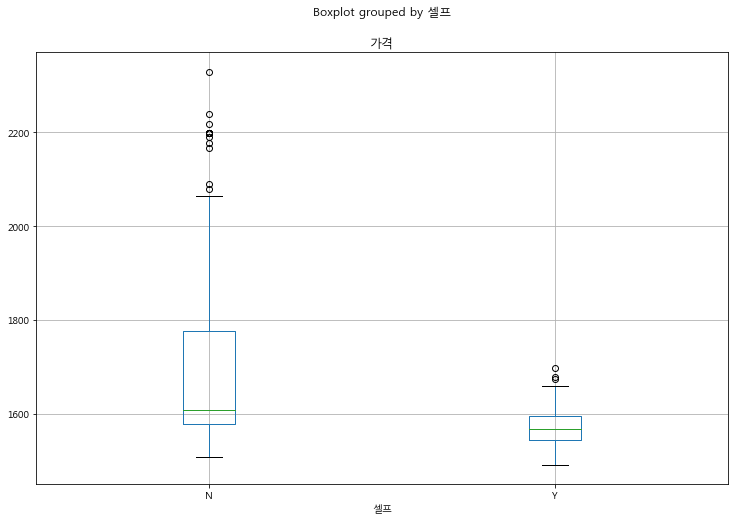

In [107]:
stations.boxplot(column="가격", by="셀프", figsize=(12, 8))

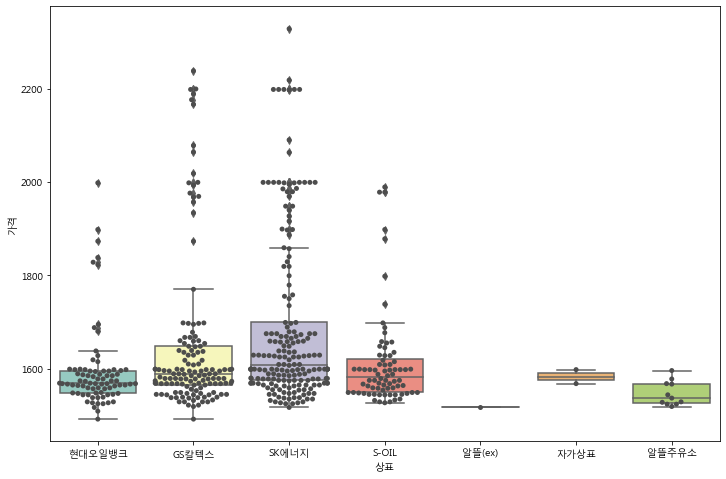

In [117]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3") # palette 색상적용
sns.swarmplot(x="상표", y="가격", data=stations, color=".3") # 분포상황을 하나하나의 점으로 디테일하게 나타내줌

In [118]:
# 서울시 구별 주유 가격 확인하기
import json
import folium
import googlemaps

In [130]:
# 서울시에서 가장 주유 가격이 비싼 곳이 어디인가?
stations.sort_values(by="가격", ascending=True).head(10)
stations.sort_values(by="가격", ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
303,서남주유소,서울 중구 통일로 30,2328.0,N,SK에너지,중구
302,SC(주) 역전주유소,서울 중구 퇴계로 15,2238.0,N,GS칼텍스,중구
493,뉴서울(강남),서울 강남구 언주로 716 (논현동),2218.0,N,SK에너지,강남구
301,필동주유소,서울 중구 퇴계로 196 (필동2가),2199.0,N,GS칼텍스,중구
266,한남지점,서울 용산구 한남대로21길 4 (한남동),2198.0,N,SK에너지,용산구
265,에너비스,서울 용산구 한남대로 82 (한남동),2198.0,N,SK에너지,용산구
300,장충주유소,서울 중구 장충단로 202 (장충동1가),2198.0,N,SK에너지,중구
299,(주)중앙에너비스 퇴계로지점,서울 중구 퇴계로 228 (필동2가),2198.0,N,SK에너지,중구
291,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2198.0,N,SK에너지,종로구
290,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2198.0,N,GS칼텍스,종로구


In [122]:
gu_data = pd.pivot_table(stations, index=["구"], values=["가격"])
gu_data.head()

,가격
구,
강남구,1772.900000
강동구,1649.125000
강북구,1544.384615
강서구,1593.823529
관악구,1612.625000


In [125]:
geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"
geo_str = json.load(open(geo_path, encoding="utf-8")) # 한글있어서 encoding="utf-8" 해줌

map = folium.Map(location=[37.5502, 126.982], zoom_start=11) 

map.choropleth(geo_data=geo_str, data=gu_data,
              columns=[gu_data.index, "가격"],
              key_on="feature.id", fill_color="YlGn")
map

In [137]:
# 서울시 주유 가격 상하위 10개 주유소 지도에 표시하기

oil_price_top10 = stations.sort_values(by="가격", ascending=False).head(10)
oil_price_bottom10 = stations.sort_values(by="가격", ascending=True).head(10)


In [134]:
g_key = "본인꺼입력"
gmap = googlemaps.Client(key=g_key)

lat = []
lng = []

for n in oil_price_top10.index:
    try:
        tmp_add = str(oil_price_top10["주소"][n]).split("(")[0] # 시리즈 형태인걸 문자열 형태로 바꿔주기
        tmp_map = gmap.geocode(tmp_add)
    
        tmp_loc = tmp_map[0].get("geometry")
        lat.append(tmp_loc["location"]["lat"])
        lng.append(tmp_loc["location"]["lng"])
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan!")

In [138]:
oil_price_top10["lat"] = lat
oil_price_top10["lng"] = lng

In [139]:
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
303,서남주유소,서울 중구 통일로 30,2328.0,N,SK에너지,중구,37.558348,126.972090
302,SC(주) 역전주유소,서울 중구 퇴계로 15,2238.0,N,GS칼텍스,중구,37.557001,126.974495
493,뉴서울(강남),서울 강남구 언주로 716 (논현동),2218.0,N,SK에너지,강남구,37.517636,127.035756
301,필동주유소,서울 중구 퇴계로 196 (필동2가),2199.0,N,GS칼텍스,중구,37.560850,126.993653
266,한남지점,서울 용산구 한남대로21길 4 (한남동),2198.0,N,SK에너지,용산구,37.534657,127.006063
265,에너비스,서울 용산구 한남대로 82 (한남동),2198.0,N,SK에너지,용산구,37.535952,127.006130
300,장충주유소,서울 중구 장충단로 202 (장충동1가),2198.0,N,SK에너지,중구,37.562719,127.007010
299,(주)중앙에너비스 퇴계로지점,서울 중구 퇴계로 228 (필동2가),2198.0,N,SK에너지,중구,37.561648,126.997142
291,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2198.0,N,SK에너지,종로구,37.586068,127.001058
290,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2198.0,N,GS칼텍스,종로구,37.574464,126.966618


In [141]:
lat = []
lng = []

for n in oil_price_bottom10.index:
    try:
        tmp_add = str(oil_price_bottom10["주소"][n]).split("(")[0] # 시리즈 형태인걸 문자열 형태로 바꿔주기
        tmp_map = gmap.geocode(tmp_add)
    
        tmp_loc = tmp_map[0].get("geometry")
        lat.append(tmp_loc["location"]["lat"])
        lng.append(tmp_loc["location"]["lng"])
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan!")

In [142]:
oil_price_bottom10["lat"] = lat
oil_price_bottom10["lng"] = lng

In [143]:
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
127,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1492.0,Y,GS칼텍스,성북구,37.607660,127.009858
126,강산제2주유소,서울 성북구 보국문로 52,1492.0,Y,현대오일뱅크,성북구,37.609163,127.010074
240,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1509.0,N,현대오일뱅크,강북구,37.631582,127.017939
268,타이거주유소,서울 은평구 수색로 188 (증산동),1517.0,Y,SK에너지,은평구,37.578424,126.902050
267,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1517.0,Y,현대오일뱅크,은평구,37.581122,126.897774
73,만남의광장주유소,서울 서초구 양재대로12길 73-71,1519.0,Y,알뜰(ex),서초구,37.459906,127.042060
241,수유동주유소,서울 강북구 도봉로 395 (수유동),1519.0,Y,GS칼텍스,강북구,37.642140,127.029568
128,원천주유소,서울 성북구 돌곶이로 142 (장위동),1519.0,N,알뜰주유소,성북구,37.614921,127.052752
129,이케이에너지㈜ 강산주유소,서울 성북구 보문로 27 (보문동7가),1522.0,Y,GS칼텍스,성북구,37.577912,127.022774
16,재원에너지(주)용일주유소,서울 동대문구 안암로 54 (용두동),1522.0,N,GS칼텍스,동대문구,37.581382,127.028081


In [148]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11) 

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10["lat"][n]):
        folium.CircleMarker(
            location=[oil_price_top10["lat"][n], oil_price_top10["lng"][n]], 
            radius=15, 
            color="#CD3181", 
            fill_color="#CD3181",
            fill=True).add_to(map)   # fill : 색 채워줌 / radius : 반경 설정 / .add_to : map에 뜨게 설정
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10["lat"][n]):
        folium.CircleMarker(
            location=[oil_price_bottom10["lat"][n], oil_price_bottom10["lng"][n]], 
            radius=5, 
            color="#CD3186CC", 
            fill_color="#CD3186CC",
            fill=True).add_to(map)
map